<a href="https://colab.research.google.com/github/i8dacake/Mat-421/blob/main/ModuleG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **21. Numerical Integration**

## **21.4 Simpson's Rule**

Consider two consecutive subintervals $[x_{i-1}, x_i]$ and $[x_i, x_{i+1}]$. How does **Simpson's Rule** work?
Simpson’s Rule approximates the area under $𝑓(𝑥)$ over these two subintervals by fitting a quadratic polynomial through the points $(x_{i-1}, f(x_{i-1})), (x_i, f(x_i))$ and $(x_{i+1}, f(x_{i+1}))$, which is a unique polynomial, and then integrating the quadratic exactly.
It is crucial to remember that to use this rule, there msut be an even number of intervals, and an odd number of grid points.
The rule gains two orders of accuracy.

***Use Simpson’s Rule to approximate $\int_0^𝜋sin(𝑥)𝑑𝑥$ with 11 evenly spaced grid points over the whole interval. Compare this value to the exact value of 2.***

In [7]:
import numpy as np

a = 0
b = np.pi
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

I_simp = (h/3) * (f[0] + 2*sum(f[:n-2:2]) \
            + 4*sum(f[1:n-1:2]) + f[n-1])
err_simp = 2 - I_simp

print(I_simp)
print(err_simp)

2.0001095173150043
-0.00010951731500430384


We can observe that the approximation is slightly less than the the actualm value. The approximated integral is very close to the value of 2, with a very small error of -0.00010951731500430384. It shows that the Simpson's Rule is quite reliable in numerical approximation for the integral in spite of a small number of points.

## **21.5 Computing Integrals in Python**

To compute integrals, one can make use of the $scipy.integrate$ sub-package which contains several functions for such computations. The $trapz$ takes an array of function values $f$ as inputs computed on a numerical grid $x$.

***Use the $𝑡𝑟𝑎𝑝𝑧$ function to approximate $\int_0^𝜋sin(𝑥) 𝑑𝑥$ for 11 equally spaced points over the whole interval. Compare this value to the one computed in the early example using the Trapezoid Rule.***

In [1]:
import numpy as np
from scipy.integrate import trapz

a = 0
b = np.pi
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

I_trapz = trapz(f,x)
I_trap = (h/2)*(f[0] + 2 * sum(f[1:n-1]) + f[n-1])

print(I_trapz)
print(I_trap)

1.9835235375094544
1.9835235375094546


Both methods yield a similar result, with a very small difference owing to floating-point arithmetic precision. Next, how do we approximate the **cumulative integral**, i.e., $F(X) = \int_{x_0}^X f(x) dx$? We can use the $𝑐𝑢𝑚𝑡𝑟𝑎𝑝𝑧$ function $𝑐𝑢𝑚𝑠𝑢𝑚$ which takes the same input as $trapz$.

***Use the $𝑐𝑢𝑚𝑡𝑟𝑎𝑝𝑧$ function to approximate the cumulative integral of $𝑓(𝑥) = sin(𝑥)$ from 0 to 𝜋 with a discretization step of 0.01. The exact solution of this integral is $𝐹(𝑥) = 𝑠𝑖𝑛(𝑥)$. Plot the results.***

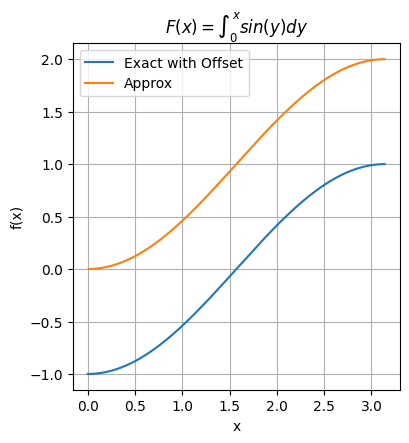

In [5]:
from scipy.integrate import cumtrapz
import matplotlib.pyplot as plt

%matplotlib inline

x = np.arange(0, np.pi, 0.01)
F_exact = -np.cos(x)
F_approx = cumtrapz(np.sin(x), x)

plt.figure(figsize = (4,4))
plt.plot(x, F_exact)
plt.plot(x[1::], F_approx)
plt.grid()
plt.tight_layout()
plt.title('$F(x) = \int_0^{x} sin(y) dy$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['Exact with Offset', 'Approx'])
plt.show()

We can observe the accuracy of the $cumtrapz$ function for giving us the numerical approximatiion that closely follows the exact solution.

Another function named **𝑞𝑢𝑎𝑑**(𝑓,𝑎,𝑏) uses a different numerical differentiation scheme to approximate integrals. It integrates the function that is defined by the function object, 𝑓, from 𝑎 to 𝑏.

***Use the 𝑖𝑛𝑡𝑒𝑔𝑟𝑎𝑡𝑒.𝑞𝑢𝑎𝑑 function to compute $\int_0^𝜋sin(𝑥)𝑑𝑥$. Compare your answer with the correct answer of 2.***

In [6]:
from scipy.integrate import quad

I_quad, est_err_quad = \
          quad(np.sin, 0, np.pi)
print(I_quad)
err_quad = 2 - I_quad
print(est_err_quad, err_quad)

2.0
2.220446049250313e-14 0.0


We can observe that the $quad$ function is reliable for numerical integration where it also automatically chooses the number of samples to yield accurate results. It provides an accurate approximation to the given function over the interval [0, 𝜋].